# Human Dataset Pre-processing and Analyzing

In [1]:
from datasets import load_dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [2]:
human_data = load_dataset("umarigan/turkish_wikipedia_dataset_NER")

In [3]:
data = pd.DataFrame(human_data['train'])
data.head()

,id,text,title,ner,cleaned_ners,cleaned_new
0,16,Film şu anlamlara gelebilir: * Camlara yapıştı...,Film (anlam ayrımı),"[{'end': 188, 'entity': 'I-ORG', 'index': 38, ...","[Sam, Bec, To, Film, İngiltere]","[Sam, Bec, İngiltere, Film]"
1,30,"Bolşevik, çoğunluktan yana anlamına gelen Rusç...",Bolşevizm,"[{'end': 85, 'entity': 'B-ORG', 'index': 17, '...","[Rusya, Sosyal, Demokrat, İşçi, Partisi, nin, ...","[İşçi, Ekim, Londra, Partisi, Brüksel, Birliği..."
2,39,küçükresim|200px|Cinepaint ekran yakalama görü...,Cinepaint,"[{'end': 55, 'entity': 'B-ORG', 'index': 15, '...","[Cin, Film, Gi, Cin]","[Film, Cin]"
3,24,Linux (telaffuz: Lin-uks); Linux çekirdeğine d...,Linux,"[{'end': 32, 'entity': 'B-ORG', 'index': 11, '...","[Uni, G, Genel, Kamu, Lisans, Linux, Vakfı, Li...","[Lin, bülten, Uni, Richard, Stal, Lisans, Gene..."
4,10,"Cengiz Han (doğum adıyla Temuçin, – 18 Ağustos...",Cengiz Han,"[{'end': 6, 'entity': 'B-PER', 'index': 1, 'sc...","[Cengiz, Han, İmparatorluğu, Cengiz, Han, Orta...","[Nehri, Bulgar, Cengiz, Orta, Xia, Tarihi, İmp..."


In [4]:
# We do not need the NER tags nor the title, so we will drop them
data = data.drop(columns=['title', 'ner', 'cleaned_ners', 'cleaned_new'])
data.columns

Index(['id', 'text'], dtype='object')

In [5]:
# We will now create new columns that will contain the number of characters and words in the text
data['text_length'] = data['text'].apply(lambda x: len(x))
data['num_words'] = data['text'].apply(lambda x: len(x.split()))
data.head()

,id,text,text_length,num_words
0,16,Film şu anlamlara gelebilir: * Camlara yapıştı...,530,69
1,30,"Bolşevik, çoğunluktan yana anlamına gelen Rusç...",8924,1096
2,39,küçükresim|200px|Cinepaint ekran yakalama görü...,253,33
3,24,Linux (telaffuz: Lin-uks); Linux çekirdeğine d...,17678,2243
4,10,"Cengiz Han (doğum adıyla Temuçin, – 18 Ağustos...",105641,13853


In [6]:
data.shape

(265000, 4)

In [7]:
data.describe()

,id,text_length,num_words
count,2.650000e+05,265000.000000,265000.000000
mean,9.909467e+05,2444.496611,335.448955
std,7.190184e+05,5347.812227,732.749545
min,1.000000e+01,16.000000,2.000000
25%,2.801188e+05,486.000000,61.000000
50%,9.630830e+05,1053.000000,138.000000
75%,1.574292e+06,2343.000000,319.000000
max,2.161594e+06,429224.000000,62923.000000


In [8]:
data.isnull().sum()

id             0
text           0
text_length    0
num_words      0
dtype: int64

In [9]:
# Average number of words in the texts
data['num_words'].mean()

335.4489547169811

In [10]:
# The minimum and maximum number of words in all texts
data['num_words'].min(), data['num_words'].max()

(2, 62923)

In [11]:
# Average number of characters in the texts
data['text_length'].mean()

2444.4966113207547

In [12]:
# The minimum and maximum number of characters in all texts
data['text_length'].min(), data['text_length'].max()

(16, 429224)

We need to check the data thoroughly before constructing the AI generated dataset so that the datasets are similar in some context.

## EDA

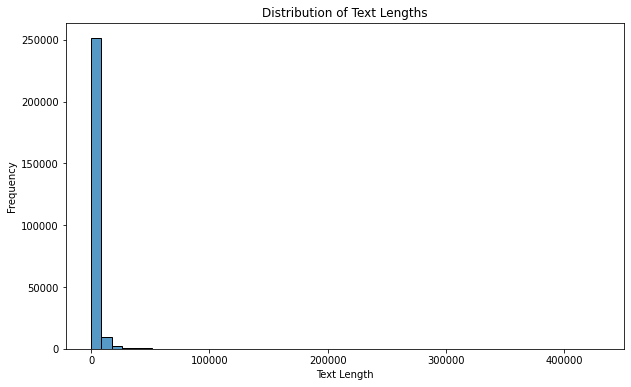

In [13]:
# Text Length Distribution
plt.figure(figsize=(10, 6))
sns.histplot(data['text_length'], bins=50)
plt.title('Distribution of Text Lengths')
plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.show()

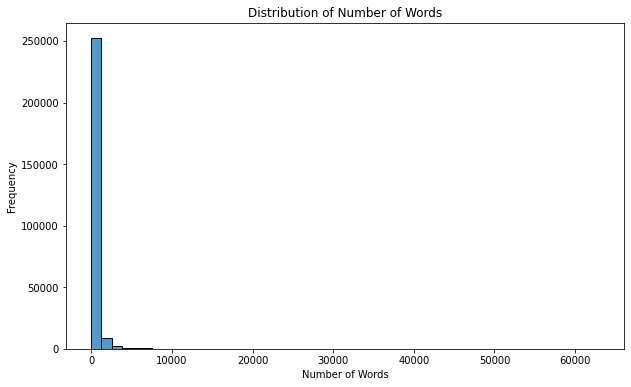

In [14]:
# Number of Words Distribution
plt.figure(figsize=(10, 6))
sns.histplot(data['num_words'], bins=50)
plt.title('Distribution of Number of Words')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.show()

As it can be seen here most of the texts have less than 4000 words and 50000 characters. Rest of the data can be marked as corrupted and dropped. The reason for this is that some algorithms have a token limit which 50000 characters can be challenging enough. So it is the best to save computation time and efficiency. 

In [15]:
# Drop rows with more than 4000 words
data = data[data['num_words'] <= 4000]
data.shape

(263245, 4)

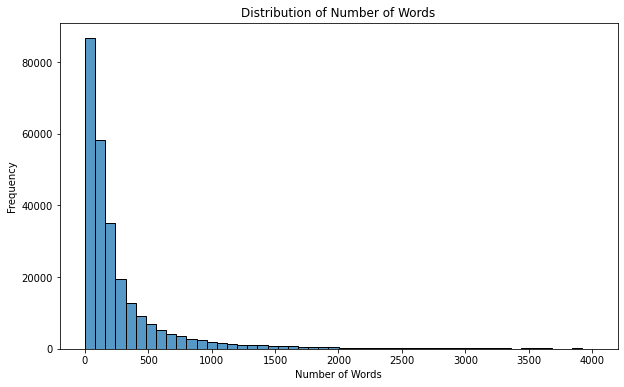

In [16]:
# Number of Words Distribution
plt.figure(figsize=(10, 6))
sns.histplot(data['num_words'], bins=50)
plt.title('Distribution of Number of Words')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.show()

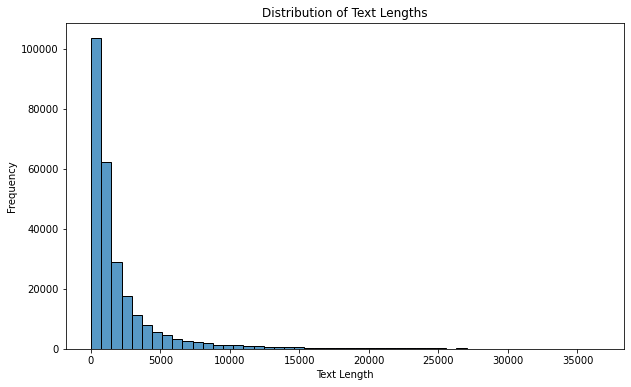

In [17]:
# Text Length Distribution
plt.figure(figsize=(10, 6))
sns.histplot(data['text_length'], bins=50)
plt.title('Distribution of Text Lengths')
plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.show()

In [18]:
data.shape

(263245, 4)

In [19]:
data['num_words'].mean()

294.02148188949457

In [20]:
data['text_length'].mean()

2140.923945374081

It can be said that there were not many extremely long texts anyways from the shape of the dataset

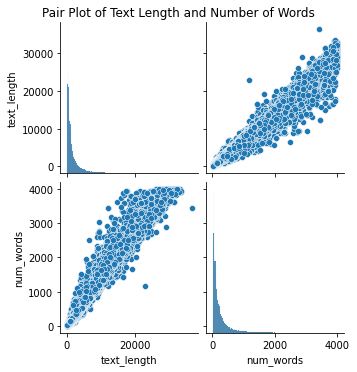

In [21]:
# Pair Plot
sns.pairplot(data[['text_length', 'num_words']])
plt.suptitle('Pair Plot of Text Length and Number of Words', y=1.02)
plt.show()

## AI Data

In [22]:
ai_data = pd.read_csv('augmented_data.csv')
ai_data.head()

,output
0,"Veri gizliliği , günümüzde hem bireylerin hem ..."
1,"Veri gizliliği , günümüzde hem bireylerin hem ..."
2,"Veri gizliliği , günümüzde hem bireylerin hem ..."
3,"Veri gizliliği , hem bireylerin hem de kurumla..."
4,"Veri gizliliği , günümüzde hem bireylerin hem ..."


In [23]:
# Function to remove specific characters that LLM produces when copied
def remove_characters(text):
    return re.sub(r'[#*]', '', text)

ai_data['output'] = ai_data['output'].apply(remove_characters)

In [24]:
# We will now create new columns that will contain the number of characters and words in the text
ai_data.rename(columns={'output': 'text'}, inplace=True)
ai_data['text_length'] = ai_data['text'].apply(lambda x: len(x))
ai_data['num_words'] = ai_data['text'].apply(lambda x: len(x.split()))
ai_data.head()

,text,text_length,num_words
0,"Veri gizliliği , günümüzde hem bireylerin hem ...",2718,371
1,"Veri gizliliği , günümüzde hem bireylerin hem ...",2746,374
2,"Veri gizliliği , günümüzde hem bireylerin hem ...",2718,371
3,"Veri gizliliği , hem bireylerin hem de kurumla...",2444,337
4,"Veri gizliliği , günümüzde hem bireylerin hem ...",2718,371


In [25]:
ai_data.shape

(7460, 3)

In [26]:
ai_data.describe()

,text_length,num_words
count,7460.000000,7460.000000
mean,2048.068633,306.306836
std,723.956386,107.822278
min,109.000000,20.000000
25%,1576.750000,238.000000
50%,2068.000000,306.000000
75%,2509.000000,368.000000
max,4114.000000,671.000000


In [27]:
ai_data.isnull().sum()

text           0
text_length    0
num_words      0
dtype: int64

In [28]:
# Average number of words in the texts
ai_data['num_words'].mean()

306.306836461126

In [29]:
# The minimum and maximum number of words in all texts
ai_data['num_words'].min(), data['num_words'].max()

(20, 4000)

In [30]:
# Average number of words in the texts
ai_data['text_length'].mean()

2048.0686327077747

In [31]:
# The minimum and maximum number of words in all texts
ai_data['text_length'].min(), ai_data['text_length'].max()

(109, 4114)

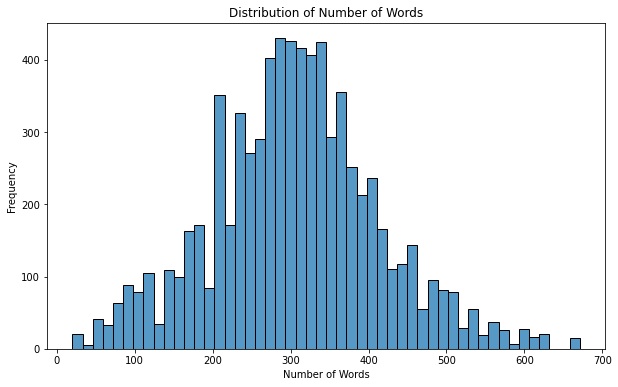

In [32]:
# Text Length Distribution
plt.figure(figsize=(10, 6))
sns.histplot(ai_data['num_words'], bins=50)
plt.title('Distribution of Number of Words')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.show()

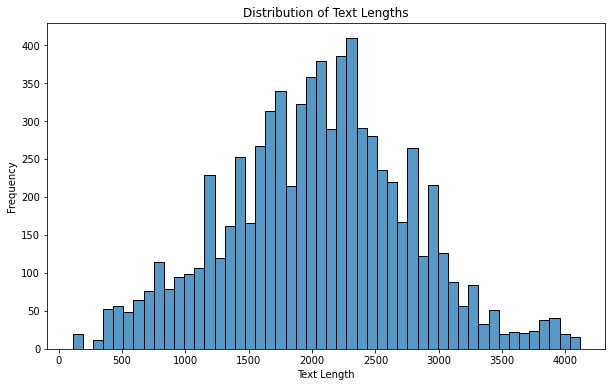

In [33]:
# Text Length Distribution
plt.figure(figsize=(10, 6))
sns.histplot(ai_data['text_length'], bins=50)
plt.title('Distribution of Text Lengths')
plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.show()

The mean of human and ai datasets is close enough even though the distributions of length are completely dissimilar. Now let's try some baseline models to check if the mean is liable as a similarity metric.

## Training Baseline Models

In [34]:
data['label'] = 'human'
ai_data['label'] = 'ai'

In [35]:
merged_df = result = pd.concat([data[['text', 'label']], ai_data[['text', 'label']]], axis=0)
merged_df

,text,label
0,Film şu anlamlara gelebilir: * Camlara yapıştı...,human
1,"Bolşevik, çoğunluktan yana anlamına gelen Rusç...",human
2,küçükresim|200px|Cinepaint ekran yakalama görü...,human
3,Linux (telaffuz: Lin-uks); Linux çekirdeğine d...,human
5,"InDesign, Adobe firmasının ürettiği, çok yönlü...",human
...,...,...
7455,Teknoloji Sağlık Alanında Devrim Yaratıyor Sağ...,ai
7456,"Teknoloji , Sağlık Alanında Devrim Yaratıyor S...",ai
7457,"Teknoloji , Sağlık Alanında Devrim ederek Yara...",ai
7458,"Teknoloji , Sağlık Alanında Devrim Yaratıyor S...",ai


In [36]:
# Preprocess the data
# Convert text data into numerical data
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(merged_df['text'])

# Labels
y = merged_df['label']

# Split data into training and testing sets

# Determine the size of the dataset
data_size = len(data)
aidata_size = len(ai_data)

# Calculate the number of test samples for both ends of the dataset
num_test_samples1 = int(data_size * 0.2)
num_test_samples2 = 1498 #int(aidata_size * 0.2)

# Create the test set from the first and last 10%
X_test = vectorizer.transform(pd.concat([merged_df.head(num_test_samples1), merged_df.tail(num_test_samples2)])['text'])
y_test = np.concatenate([y[:num_test_samples1], y[-num_test_samples2:]])

# Create the training set from the middle 80%
X_train = vectorizer.transform(merged_df.iloc[num_test_samples1:-num_test_samples2]['text'])
y_train = y[num_test_samples1:-num_test_samples2]


# Create a Logistic Regression model
model = LogisticRegression()

# Train the model
model.fit(X_train, y_train)

c:\Users\Asus\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

Accuracy: 0.9962324782536428
Classification Report:
               precision    recall  f1-score   support

          ai       0.98      0.88      0.93      1498
       human       1.00      1.00      1.00     52649

    accuracy                           1.00     54147
   macro avg       0.99      0.94      0.96     54147
weighted avg       1.00      1.00      1.00     54147



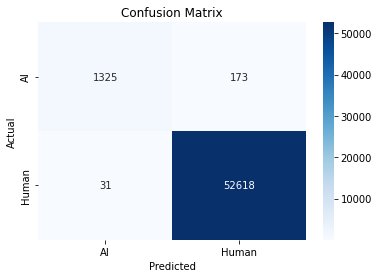

In [37]:
# Make predictions
predictions = model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, predictions))
print("Classification Report:\n", classification_report(y_test, predictions))

# Generate and display the confusion matrix
cm = confusion_matrix(y_test, predictions)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['AI', 'Human'], yticklabels=['AI', 'Human'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()